In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.metrics import auc

In [3]:
neg = pd.read_csv('HW4_Q3_neg.csv', header=None)
neg = neg.rename(columns={0: "val"})

pos = pd.read_csv('HW4_Q3_pos.csv', header=None)
pos = pos.rename(columns={0: "val"})

data = pd.read_csv('HW4_Q3_data.csv', header=None)
data = data.rename(columns={0: "val"})

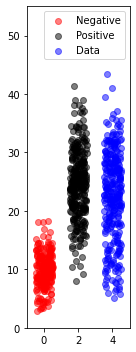

In [4]:
fig,ax = plt.subplots(figsize = (2,5))
jitter = np.random.rand(len(pos))
jitter2 = np.random.rand(len(neg))
jitter3 = np.random.rand(len(data))
ax.scatter(-0.5+jitter2,neg['val'],alpha=0.5,color='red',label='Negative')
ax.scatter(1.5+jitter,pos['val'],alpha=0.5,color='black',label='Positive')
ax.scatter(3.5+jitter3,data['val'],alpha=0.5,color='blue',label='Data')
ax.set_xlim([-1,5])
ax.set_ylim([0,55])
ax.legend()
plt.tight_layout()

In [5]:
def sp_fxn(c,neg):
    sp = 100 * len(neg[neg['val'] <= c]) / len(neg)
    return sp
def se_fxn(c,pos):
    se = 100 * len(pos[pos['val'] > c]) / len(pos)
    return se
def p_fxn(c,data): 
    p = 100 * len(data[data['val'] > c]) / len(data)
    return p

def adjp_fxn(c,data, pos,neg): 
    se = se_fxn(c,pos)
    sp = sp_fxn(c,neg)
    p = p_fxn(c,data)/100
    p1 = (p-(1-sp))/(se+sp-1)
    return p1*100

In [7]:
c = 16
print(sp_fxn(c,neg))
print(se_fxn(c,pos))
print(p_fxn(c,data)) 
print(adjp_fxn(c,data,pos,neg)) 

97.5
93.0
79.33333333333333
51.34212840809147


In [9]:
max = 0 
seList = []
spList = []
for i in range(0,45):
    se = se_fxn(i,pos)
    sp = sp_fxn(i,neg)
    youden = se + sp - 1
    seList.append(se/100)
    spList.append(sp/100)
    if(youden > max): 
        max = youden
        se_max = se
        sp_max = sp
print("SE:",se_max,"SP:",sp_max,"C:",c)

SE: 96.0 SP: 96.0 C: 15


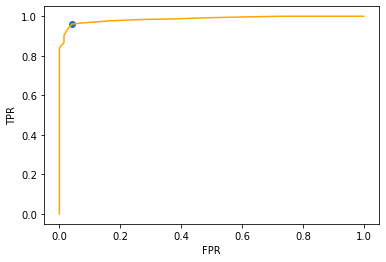

auc: 0.986525


In [10]:
fpr = 1 - np.array(spList)
area = auc(fpr, seList)
plt.figure()
plt.plot(fpr, seList, color='orange')
plt.scatter(1-se_max/100, sp_max/100)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()
print("auc:",area)

In [18]:
theta_list = []
for i in range(0,45):
    x = adjp_fxn(i,data,pos,neg)
    if(i == 15): y = x
    theta_list.append(x)
y

50.16055846422339

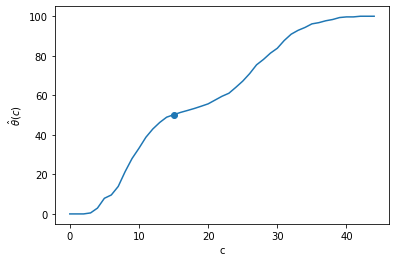

In [23]:
plt.plot(range(0,45), theta_list)
plt.scatter(15, y)
plt.xlabel('c')
plt.ylabel(r'$\hat{\theta}(c)$')
plt.show()